Loading the libraries

In [1]:
import json
import gzip
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import itertools

Loading the preprocessing modules

In [2]:
from Amazon_preprocess import DataSetPreprocessor, TextPreprocessor

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anutk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anutk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading part of the data used in the project

All Amazon Meta is available at https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

In [3]:
data = []
contol = 250000
count = 0

with gzip.open('All_Amazon_Meta.json.gz', 'rt', encoding = 'utf-8') as zipfile:
    for l in zipfile:
        data.append(json.loads(l.strip()))
        count += 1
        if count == contol:
            break
            
df = pd.DataFrame.from_dict(data)
df

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Clothing, Shoes & Jewelry, Women, Clothing, T...",,[(=^ ^=) 1.It is made of high quality material...,,"Women Blouse, Ninasill Hooded Sweatshirt Coat ...",[],[https://images-na.ssl-images-amazon.com/image...,,Ninasill_Blouse,"[Import, Versatile Occasions - Great for Daily...",[],[],{},Movies & TV,,"<div class=""a-fixed-left-grid a-spacing-none"">...",$9.99 - $12.50,6305121869
1,"[Clothing, Shoes & Jewelry, Traditional & Cult...",,"[<b><br>Hi friend, welcome to our store. Befor...",,Coolred-Women Retro Split Sexy Skinny Premium ...,[],[https://images-na.ssl-images-amazon.com/image...,,Coolred-Women,"[100% Spandex, Order Larger If You are Between...","14,082,777 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",$16.08 - $18.36,6318708057
2,"[Clothing, Shoes & Jewelry, Men, Clothing, Sho...",,[Gaok men's pants are all made from cotton mat...,"class=""a-normal a-align-center a-spacing-smal...",Gaok Men's Retro Cotton Multi-Pocket Camo Carg...,[],[https://images-na.ssl-images-amazon.com/image...,,Gaok,"[Cotton, Zipper closure, Material:100% cotton,...","2,877,972 in Clothing, Shoes & Jewelry (","[B07CRJ95M7, B008AHISU4, B07B8F98W2, B07DD98Q7...",{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",$26.99,6342506256
3,"[Clothing, Shoes & Jewelry, Men, Clothing, Jea...",,[<b>pant size(Unit:inch)</b><br> W30(tag30) Wa...,"class=""a-normal a-align-center a-spacing-smal...",QIBOE Men's Baggy Jeans Denim Sweatpants Loose...,"[B077GQQKRV, B07CBJQTF6, B07H2Z6S9J, B06Y26PZ5...",[https://images-na.ssl-images-amazon.com/image...,,QIBOE,"[Denim, Zipper closure, Material: cotton, Styl...","1,506,383 in Clothing, Shoes & Jewelry (","[B07H2Z6S9J, B077GQQKRV, B072XTTTK9, B002DMJOC...",{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",$38.99,6342509379
4,"[Clothing, Shoes & Jewelry, Women, Accessories...",,[All of our sunglasses offer protection agains...,,Crazy Explosion-proof Lens Polarized Sunglasse...,[],[https://images-na.ssl-images-amazon.com/image...,,OLO,"[Material: Polycarbonate, Main features: Windp...","936,295 in Sports & Outdoors (",[B00V6F372G],{'ASIN: ': '6342522081'},Sports & Outdoors,,,$3.29,6342522081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"[Clothing, Shoes & Jewelry, Men, Accessories, ...",,[],"class=""a-normal a-align-center a-spacing-smal...",Chaos Hats Men's Technician Fine Gauge Beanie,"[B003YXZ4XI, B014VHIG2Q, B07CNFPDCS, B07687NVX...",[https://images-na.ssl-images-amazon.com/image...,,Chaos,"[acrylic, 100% Acrylic, Fine gauge 100% soft a...","32,042 in Sports & Outdoors (","[B003YXZ4XI, B07687NVXX, B014VHIG2Q, B07H9J46T...","{'Shipping Weight:': '1.5 pounds (', 'ASIN: ':...",Sports & Outdoors,,,$14.75 - $19.99,B003YXZ4YW
249996,"[Clothing, Shoes & Jewelry, Women, Jewelry, Ea...",,[],,Sterling Silver Swarovski Elements Light Ameth...,[],[https://images-na.ssl-images-amazon.com/image...,,Amazon Collection,"[Domestic, <span class=""a-text-bold"">Package D...","18,871,961 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,Amazon Collection,,B003YXYUNS
249997,"[Clothing, Shoes & Jewelry, Women, Handbags & ...",,[Sydney Love is the perfect match between ever...,,Sydney Love Quilted Subway Print Drawstring Cr...,[],[https://images-na.ssl-images-amazon.com/image...,,Sydney Love,"[Fabric and synthetic, Nylon lining, magnet cl...","22,565,383 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,B003YXXJB2
249998,"[Clothing, Shoes & Jewelry, Boys, Clothing, To...",,[Long sleeve fashion rugby shirt],,Company 81 Boy

Preprocessing the dataset

In [4]:
DSP = DataSetPreprocessor()
prep_df = DSP.fit_transform(df)
TP = TextPreprocessor()
prep_df = TP.fit_transform(prep_df)
prep_df

,category,description,title,image,brand,price
0,clothing shoe jewelry woman clothing top tee b...,made high quality material durable enought dai...,woman blouse ninasill hooded sweatshirt coat w...,[https://images-na.ssl-images-amazon.com/image...,Ninasill_Blouse,11.24
1,clothing shoe jewelry traditional cultural wea...,hi friend welcome store purchase pls check siz...,coolred woman retro split sexy skinny premium ...,[https://images-na.ssl-images-amazon.com/image...,Coolred Women,17.22
2,clothing shoe jewelry men clothing short cargo...,gaok men pant made cotton material provide sof...,gaok men retro cotton multi pocket camo cargo ...,[https://images-na.ssl-images-amazon.com/image...,Gaok,26.99
3,clothing shoe jewelry men clothing jean denim ...,pant size unit inch w tag waist hip length ...,qiboe men baggy jean denim sweatpants loose pant,[https://images-na.ssl-images-amazon.com/image...,QIBOE,38.99
4,clothing shoe jewelry woman accessory sunglass...,sunglass offer protection excessive exposure l...,crazy explosion proof lens polarized sunglass ...,[https://images-na.ssl-images-amazon.com/image...,OLO,3.29
...,...,...,...,...,...,...
56388,clothing shoe jewelry novelty clothing novelty...,mask logo junior sizing sm md lg xl si...,mar volta mask girl jr soft tee black,[],Unknown,30.47
56389,clothing shoe jewelry girl school uniform clot...,miss school essential best selling house brand...,cookie brand little girl bib front jumper kick...,[https://images-na.ssl-images-amazon.com/image...,Cookie Kids,29.49
56390,clothing shoe jewelry men accessory tie cummer...,color white material polyester length inch wi...,toptie unisex zebra animal print skinny inch n...,[https://images-na.ssl-images-amazon.com/image...,TopTie,2.99
56391,clothing shoe jewelry woman jewelry earring dr...,,sterling silver swarovski element crystal crys...,[https://images-na.ssl-images-amazon.com/image...,Amazon Collection,6.58


Loading saved preprocessed dataset

In [5]:
work_df = pd.read_csv('preprocessed_df.csv')
work_df.dropna(inplace = True)
work_df.reset_index(inplace = True)
work_df.drop(columns=['Unnamed: 0', 'index'], inplace = True)

Loading function for creating the ontology

In [6]:
from creation import create_ontology

Taking the necessary data for the ontology and removing certain words

In [7]:
united_columns = work_df['title'] + ' ' + work_df['category']
united_columns = united_columns.str.replace('clothing', '')
united_columns = united_columns.str.replace('shoe', '')
united_columns = united_columns.str.replace('jewelry', '')
united_columns = united_columns.str.replace('  ', ' ')

Creating the ontology

In [8]:
created = create_ontology(united_columns, 0.015)

             word  cluster
0          dangle        0
1        licensed        1
2        sterling        2
3            drop        0
4       stainless        4
5      officially        1
6          safety        6
7   approximately        7
8         eyewear        8
9         measure        7
10         silver        2
11           body       11
12       piercing       11
13       sunglass        2
14           work        6
15        uniform        6
16          steel        4
Empty DataFrame
Columns: [word, cluster]
Index: []


Loading function for visualising the ontology

In [9]:
from creation import visualise_ontology

Loading the dataset which was created from the previous step

In [10]:
u_col = pd.read_csv('ontology.csv')
u_col.dropna(inplace = True)
u_col.reset_index(inplace = True)
u_col.drop(columns=['Unnamed: 0', 'index'], inplace = True)

Visualising the ontology

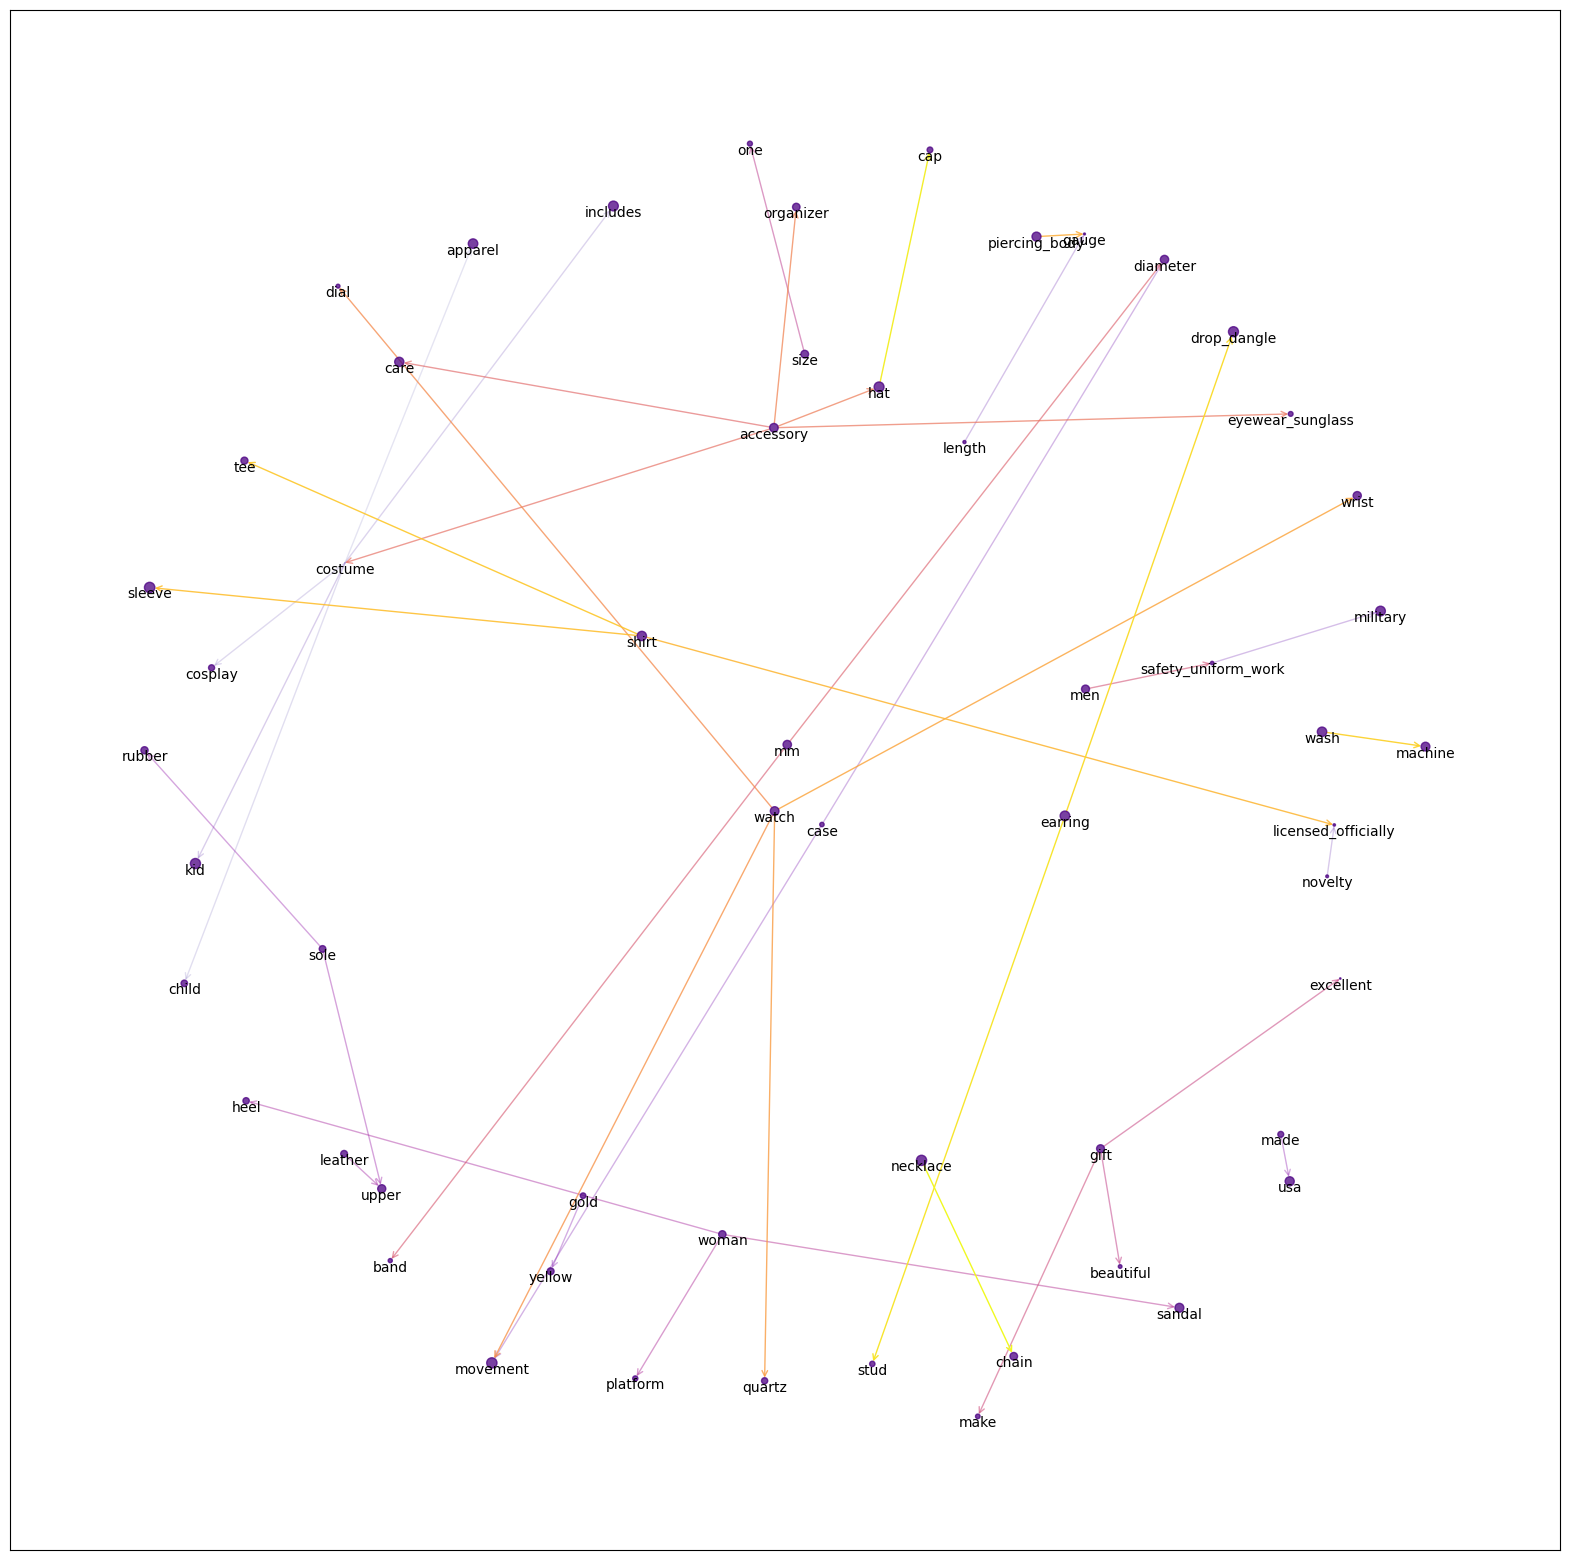

In [11]:
visualise_ontology(u_col['united'], 0.015)